In [2]:
import numpy as np
import pandas as pd

import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

%matplotlib inline

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('zomato.csv')

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [6]:
a,b=df.shape  # Since shape return tuple thus storing value in a and b 
print('Data Point= ',a*b)

Data Point=  879189


In [7]:
df.shape

(51717, 17)

In [8]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

## Data Preprocesing

In [9]:
df.drop(['url','phone','dish_liked'],axis=1,inplace=True)

In [10]:
df.duplicated().sum()

43

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.isnull().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7767
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     345
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [13]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


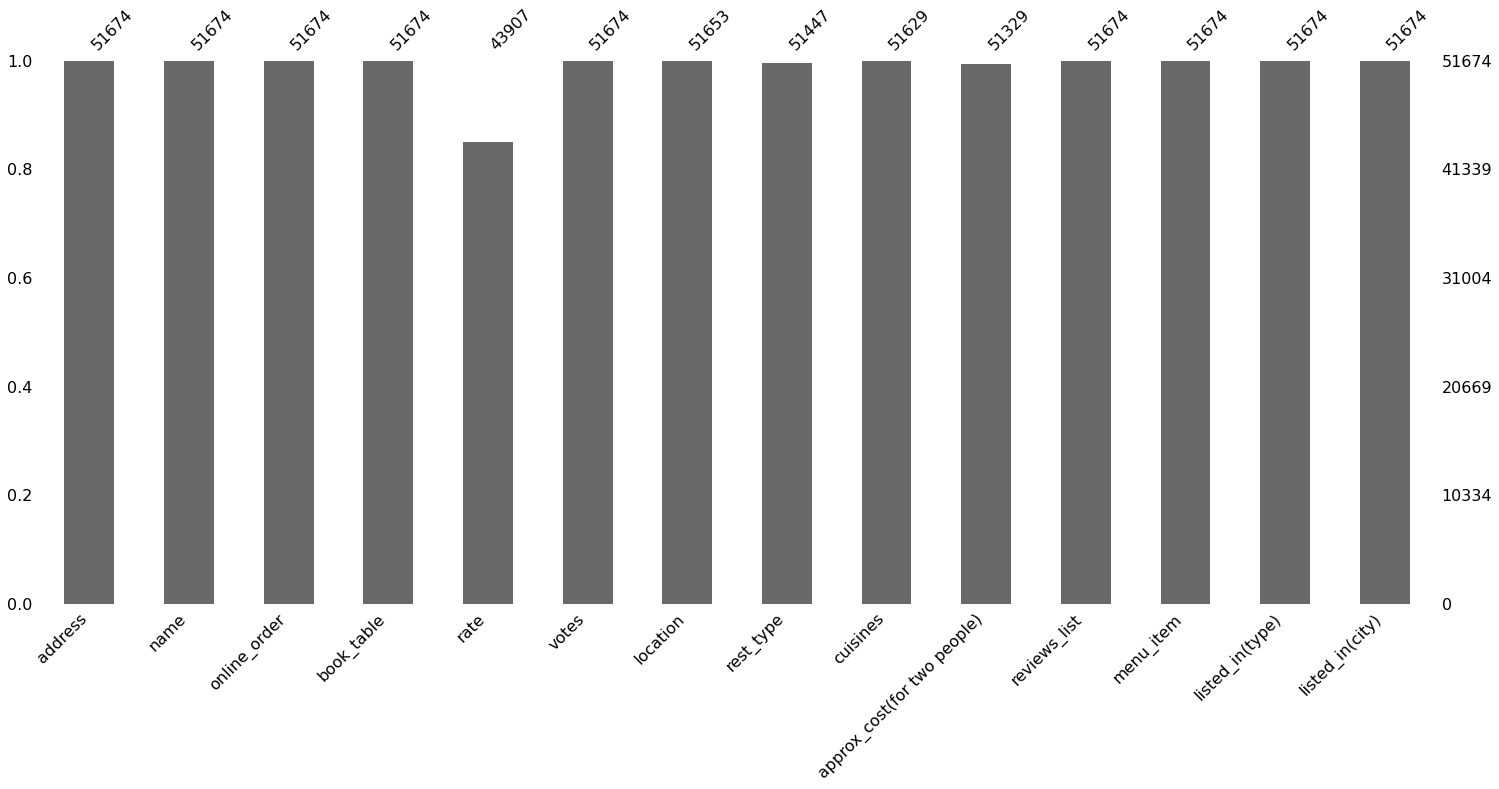

In [14]:
import missingno as msno
msno.bar(df)
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51674 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      51674 non-null  object
 1   name                         51674 non-null  object
 2   online_order                 51674 non-null  object
 3   book_table                   51674 non-null  object
 4   rate                         43907 non-null  object
 5   votes                        51674 non-null  int64 
 6   location                     51653 non-null  object
 7   rest_type                    51447 non-null  object
 8   cuisines                     51629 non-null  object
 9   approx_cost(for two people)  51329 non-null  object
 10  reviews_list                 51674 non-null  object
 11  menu_item                    51674 non-null  object
 12  listed_in(type)              51674 non-null  object
 13  listed_in(city)              51

In [16]:
df.dropna(how='any',inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43

In [18]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [19]:
df=df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'})
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [20]:
df.dtypes

address         object
name            object
online_order    object
book_table      object
rate            object
votes            int64
location        object
rest_type       object
cuisines        object
cost            object
reviews_list    object
menu_item       object
type            object
city            object
dtype: object

In [21]:
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [22]:
# Cleaning individual columns.
#Cost for 2 people is in object data type we need to convert it to int

df['cost']=df['cost'].astype(str)
df['cost'] = df['cost'].apply(lambda x: x.replace(',','.')) #Using lambda function to replace ',' from cost
df['cost'] = df['cost'].astype(float)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   cost          43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [24]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [25]:
#Removing '/5' from Rates
df = df.loc[df.rate !='NEW']
df = df.loc[df.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
df.rate = df.rate.apply(remove_slash).str.strip().astype('float')
df['rate'].head() # looking at the dataset after transforma

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [26]:
# Adjust the column names
df.name = df.name.apply(lambda x:x.title())
df.online_order.replace(('Yes','No'),(True, False),inplace=True)
df.book_table.replace(('Yes','No'),(True, False),inplace=True)
df.head() # looking at the dataset after transformation

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [27]:
#Encode the input Variables
def Encode(df):
    for column in df.columns[~df.columns.isin(['rate', 'cost', 'votes'])]:
        df[column] = df[column].factorize()[0]
    return df

en = Encode(df.copy())
en.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0


# Exploratory Data Analysis

Text(0.5, 1.0, 'Restaurants delivering online or not')

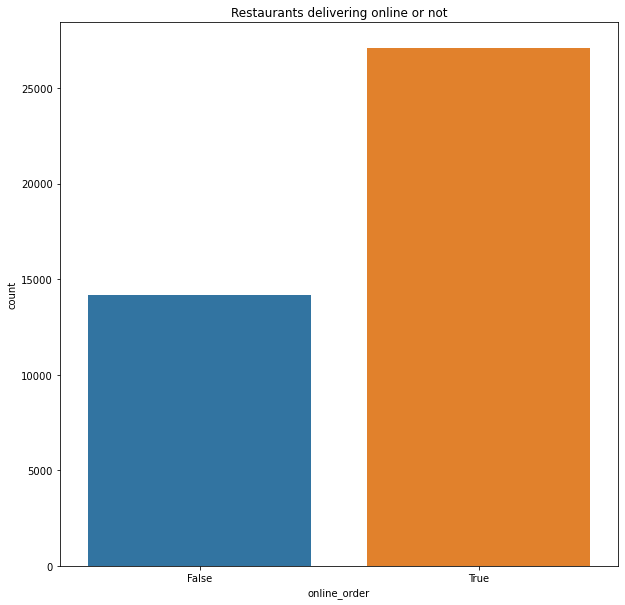

In [28]:
#Restaurants delivering Online or not
sns.countplot(df['online_order'])
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or not')

In [29]:
df['city'].value_counts()

BTM                      2580
Koramangala 7th Block    2361
Koramangala 4th Block    2254
Koramangala 5th Block    2250
Koramangala 6th Block    2121
Jayanagar                1915
JP Nagar                 1633
Indiranagar              1537
Church Street            1512
MG Road                  1510
Brigade Road             1483
Lavelle Road             1449
Residency Road           1345
HSR                      1330
Marathahalli             1293
Bannerghatta Road        1208
Whitefield               1201
Old Airport Road         1173
Brookefield              1139
Basavanagudi             1072
Kammanahalli             1019
Sarjapur Road            1018
Kalyan Nagar              993
Bellandur                 956
Frazer Town               953
Malleshwaram              946
Rajajinagar               872
Electronic City           818
Banashankari              727
New BEL Road              569
Name: city, dtype: int64

In [30]:
df['type'].value_counts()

Delivery              20431
Dine-out              14062
Desserts               2709
Cafes                  1511
Drinks & nightlife     1045
Buffet                  847
Pubs and bars           632
Name: type, dtype: int64

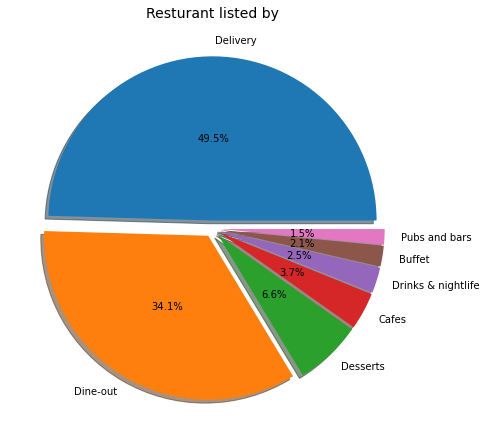

In [31]:
pie, ax = plt.subplots(figsize=[25,15])
plt.subplot(1,3,1)
labels = df['type'].value_counts().keys()
plt.pie(x=df['type'].value_counts(), autopct="%.1f%%", explode=[0.05]*7, labels=labels, pctdistance=0.5,shadow=True)
plt.title("Resturant listed by", fontsize=14);
pie.savefig("Resturant listed by.png")

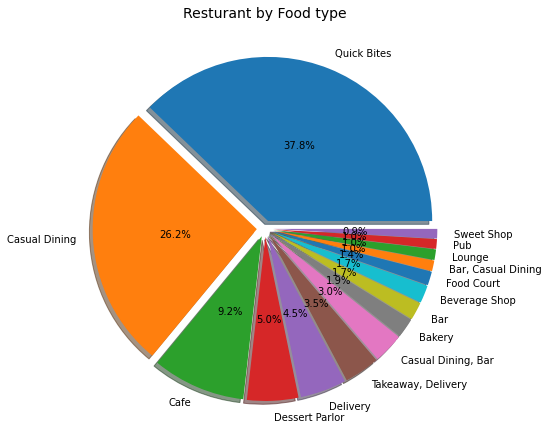

In [32]:
pie, ax = plt.subplots(figsize=[25,15])
plt.subplot(1,3,2)
labels = df['rest_type'].value_counts()[:15].keys()
plt.pie(x=df['rest_type'].value_counts()[:15], autopct="%.1f%%", explode=[0.05]*15, labels=labels, pctdistance=0.5,shadow=True)
plt.title("Resturant by Food type", fontsize=14);
pie.savefig("Resturant by Food type.png")
plt.show()

([<matplotlib.patches.Wedge at 0x1e9c698d9d0>,
 [Text(-0.5199562313997895, 0.9693531438173236, 'accepted'),
  Text(0.5672249797088612, -1.0574761568916258, 'not accepted')],
 [Text(-0.2836124898544306, 0.5287380784458128, '65.7%'),
  Text(0.3308812381635023, -0.6168610915201149, '34.3%')])

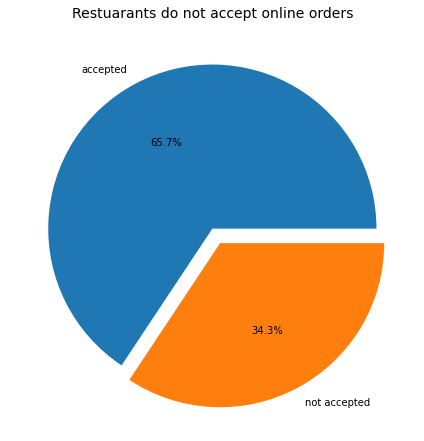

In [33]:
pie, ax = plt.subplots(figsize=[25,15])
plt.subplot(1,3,3)
x=df['online_order'].value_counts()
labels=['accepted','not accepted']
plt.title("Restuarants do not accept online orders", fontsize=14);
plt.pie(x,explode=[0.0,0.1],autopct='%1.1f%%', labels=labels)

<AxesSubplot:xlabel='online_order', ylabel='rate'>

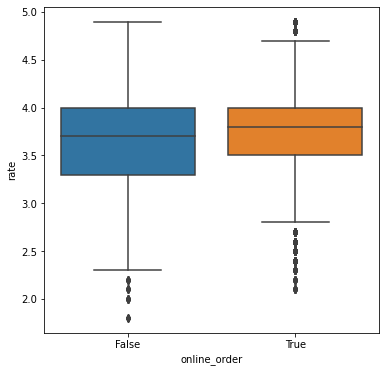

In [35]:
#Visualizing Online Order vs Rate
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

<AxesSubplot:xlabel='book_table', ylabel='rate'>

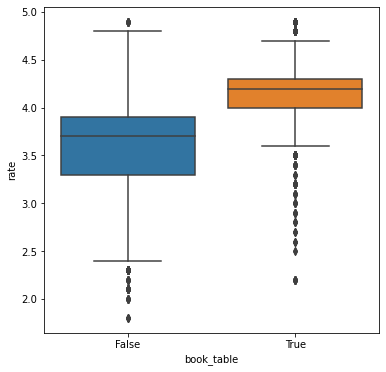

In [36]:
#Visualizing Book Table vs Rate
plt.figure(figsize = (6,6))
sns.boxplot(x = 'book_table', y = 'rate', data = df)

Text(0.5, 1.0, 'Restaurants allowing table booking or not')

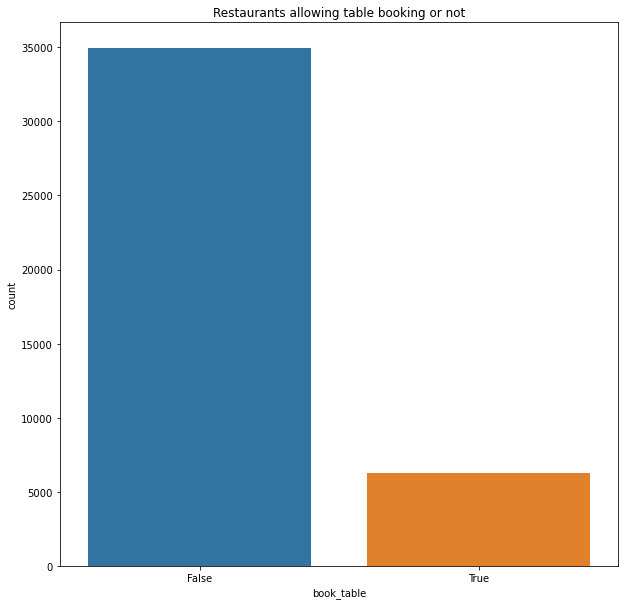

In [37]:
#Restaurants allowing table booking or not
sns.countplot(df['book_table'])
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants allowing table booking or not')

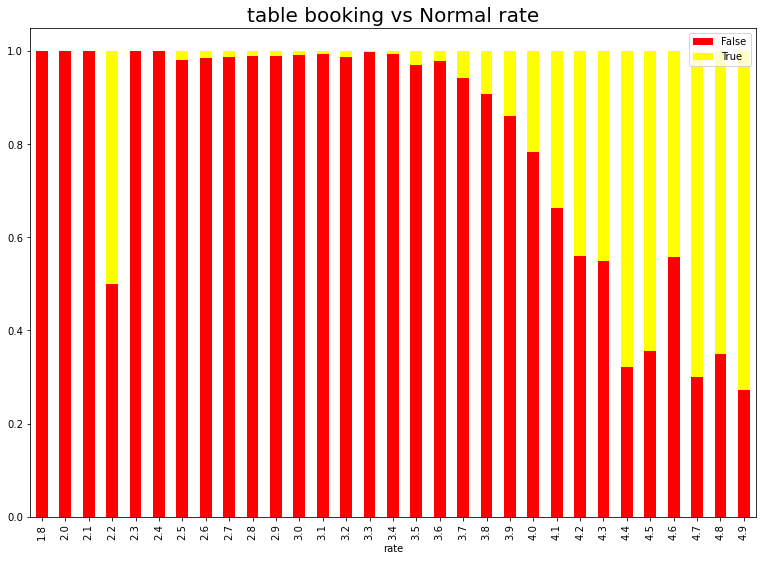

In [38]:
#Table booking Rate vs Normal Rate
plt.rcParams['figure.figsize'] = (13, 9)
Y = pd.crosstab(df['rate'], df['book_table'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('table booking vs Normal rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

Text(0.5, 1.0, 'Location wise count for restaurants')

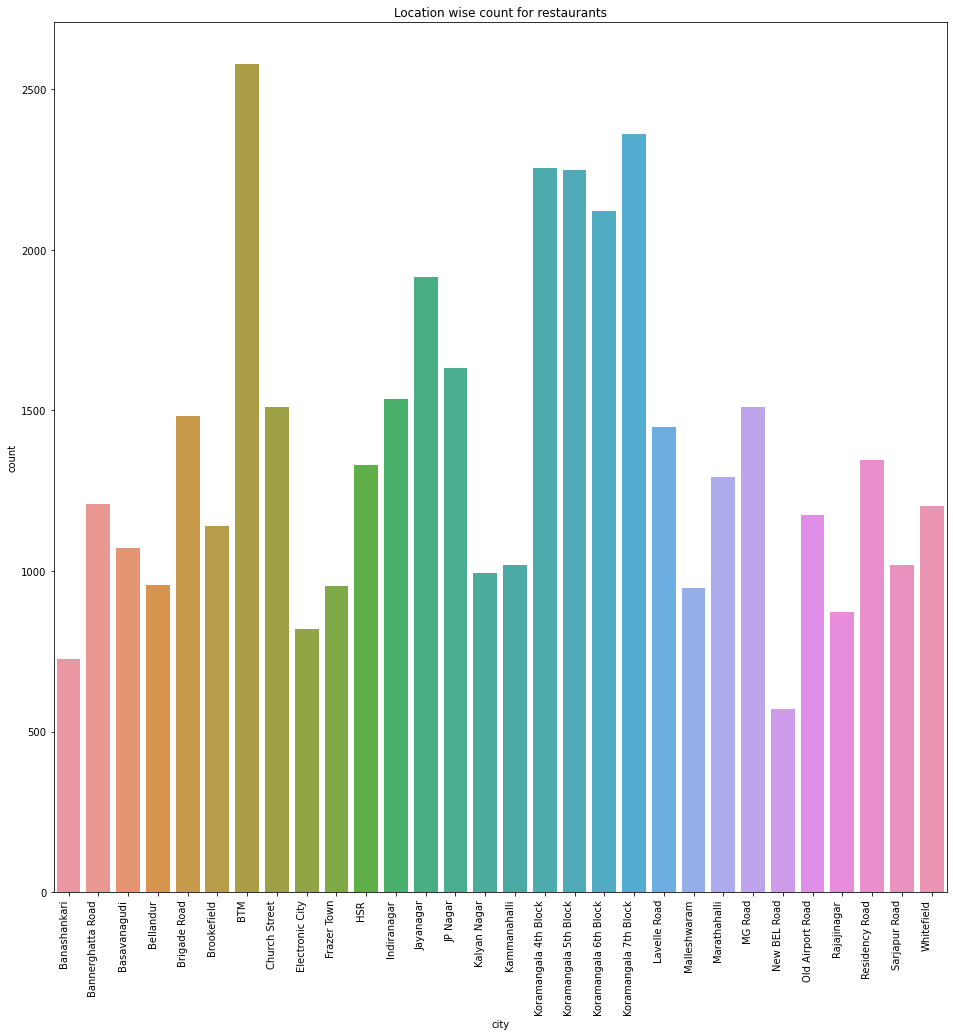

In [39]:
#Location
sns.countplot(df['city'])
sns.countplot(df['city']).set_xticklabels(sns.countplot(df['city']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(16,16)
plt.title('Location wise count for restaurants')

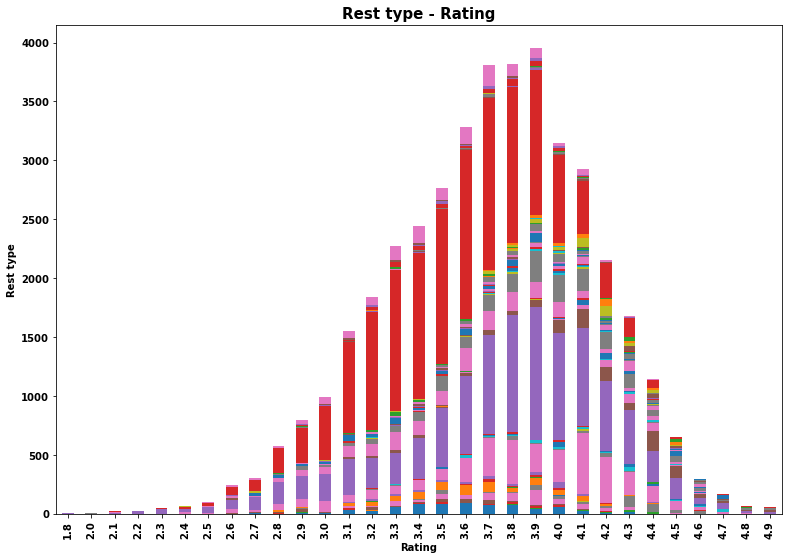

In [40]:
#Gaussian Rest type and Rating
loc_plt=pd.crosstab(df['rate'],df['rest_type'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Rest type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Rest type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();

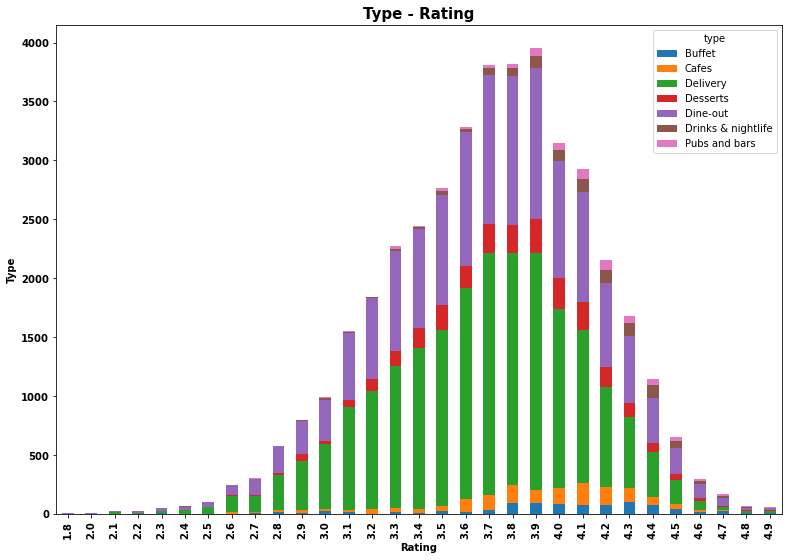

In [42]:
#Type and Rating
type_plt=pd.crosstab(df['rate'],df['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

Text(0.5, 1.0, 'NO. of restaurants in a Location')

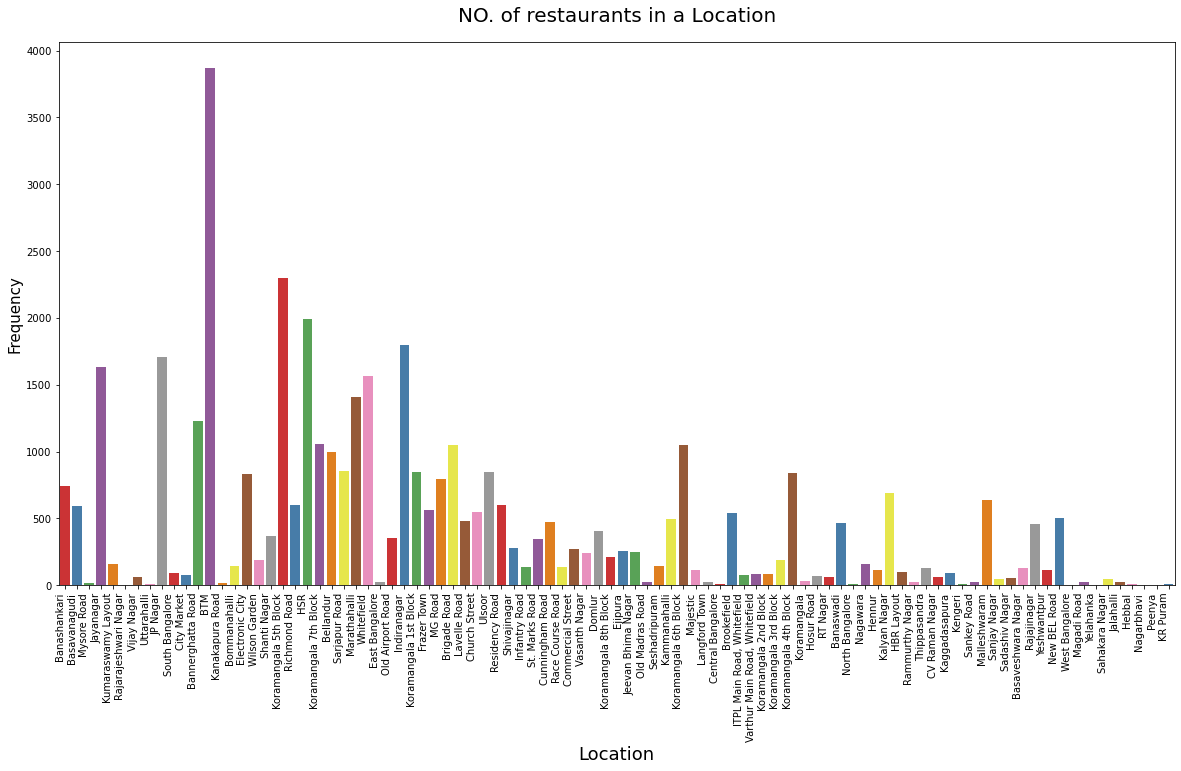

In [43]:
#No. of Restaurants in a Location
fig = plt.figure(figsize=(20,10))
loc = sns.countplot(x="location",data=df, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('NO. of restaurants in a Location',size = 20,pad=20)

Text(0.5, 1.0, 'Restaurant types')

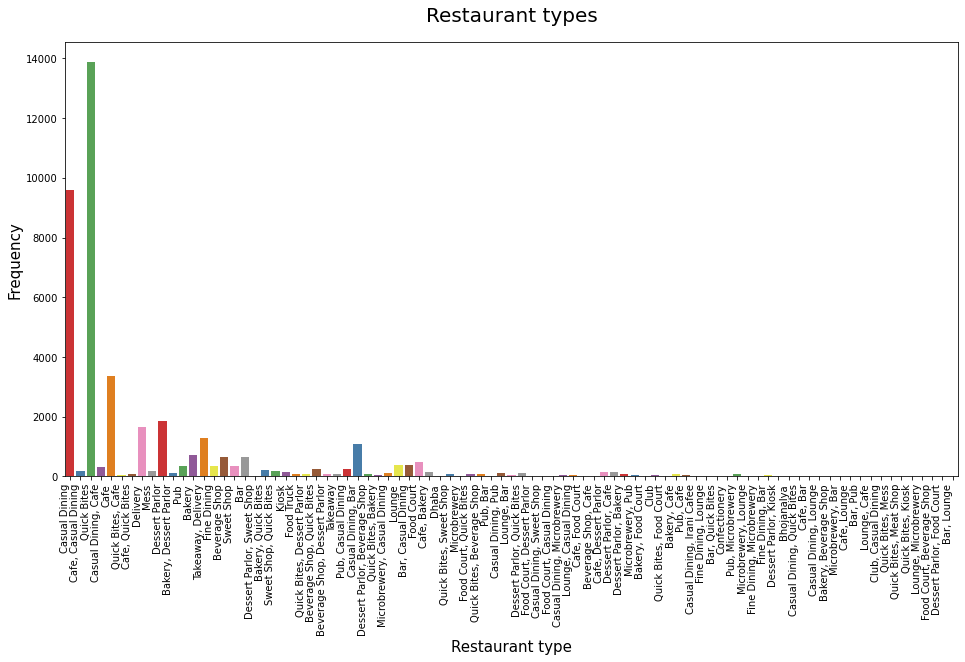

In [44]:
#Restaurant type
fig = plt.figure(figsize=(16,8))
rest = sns.countplot(x="rest_type",data=df, palette = "Set1")
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant type",size=15)
rest 
plt.title('Restaurant types',fontsize = 20 ,pad=20)

Text(0.5, 0, 'Number of outlets')

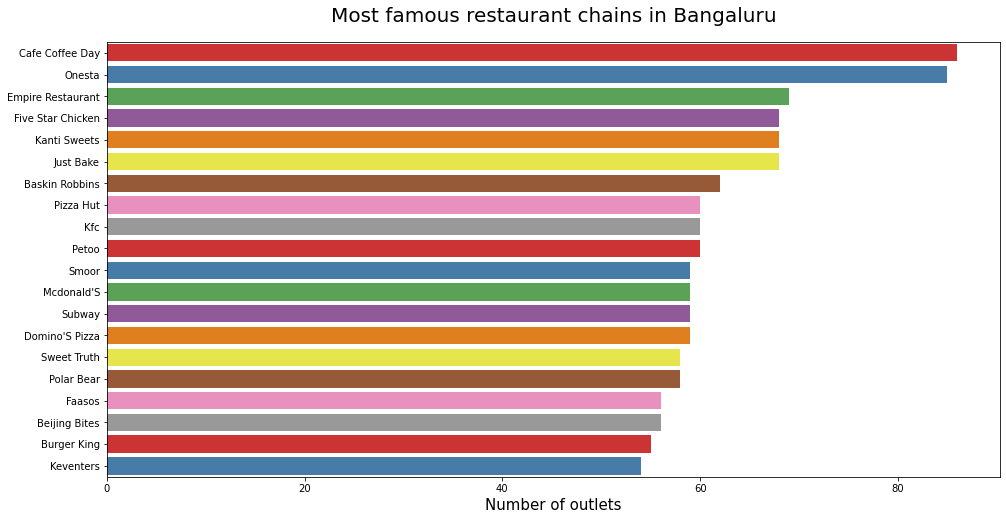

In [45]:
#Most famous Restaurant chains in Bengalore
plt.figure(figsize=(16,8))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

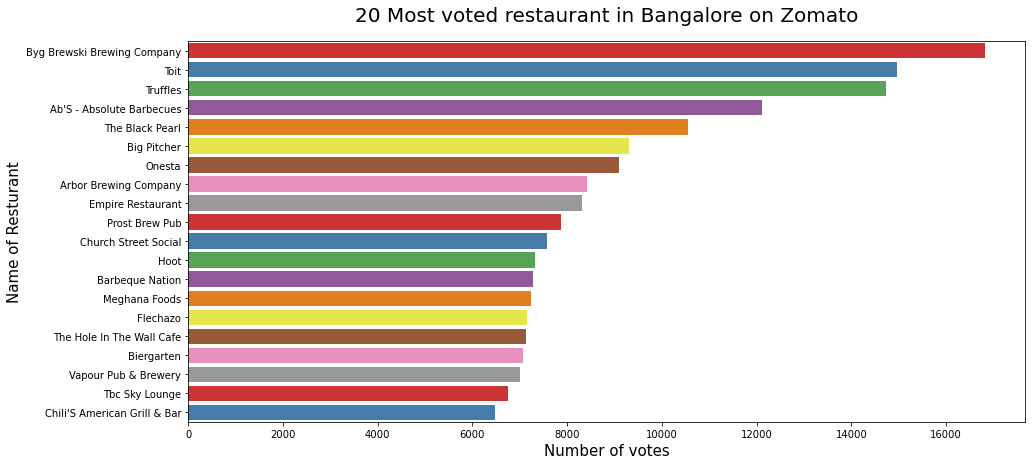

In [46]:
# Highest Voted Restaurant

y = df.groupby('name')['votes'].max().nlargest(20).index 
x = df.groupby('name')['votes'].max().nlargest(20)

plt.figure(figsize=(15,7))
sns.barplot(x,y,palette='Set1');
plt.title("20 Most voted restaurant in Bangalore on Zomato",size=20,pad=20)
plt.xlabel("Number of votes",size=15);
plt.ylabel("Name of Resturant",size=15);

In [47]:
print('Mean cost for eating for 2 person = ', df['cost'].mean())

Mean cost for eating for 2 person =  369.58625869970587


<AxesSubplot:xlabel='cost', ylabel='Density'>

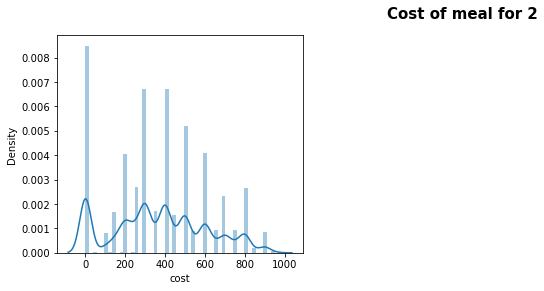

In [48]:
plt.figure(figsize=(15,4))
plt.suptitle("Cost of meal for 2", fontweight='bold', fontsize=15)
plt.subplot(1,3,1)
sns.distplot(df['cost'])

# Feature Selection

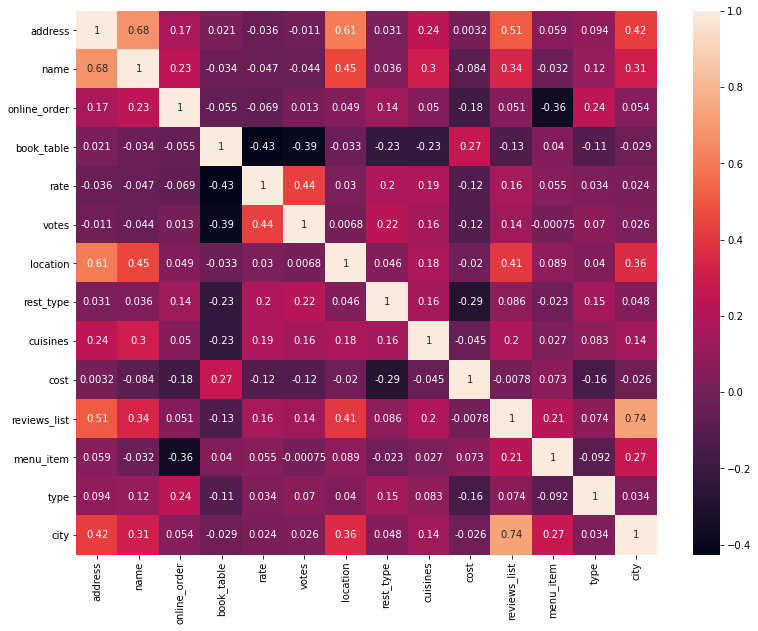

In [50]:
#Pearson Correlation
plt.figure(figsize=(13,10))
sns.heatmap(zomato.corr(), annot=True);

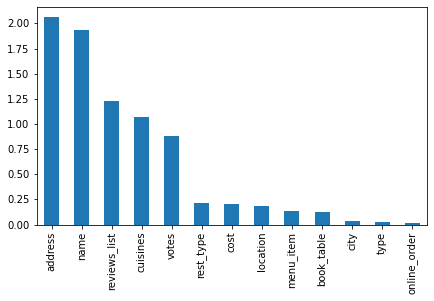

In [51]:
#Mutual Information
y=zomato['rate']
x=zomato.drop('rate', axis=1)

mi=mutual_info_regression(x,y)
mi=pd.Series(mi)
mi.index=x.columns
mi.sort_values(ascending=False).plot.bar(figsize=(7,4));

In [91]:
zomato.location.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91], dtype=int64)

# Feature generation

In [105]:
df = df.fillna({
    'rate': '0/5',  # Assuming missing ratings as 0/5
    'cost': df['cost'].mean(),
    'dish_liked': 'Unknown',
    'rest_type': 'Unknown',
    'cuisines': 'Unknown',
    'reviews_list': 'No reviews'
})

In [112]:
# One-hot encode cuisines
cuisine_counts = df['cuisines'].str.get_dummies(sep=',')
df = pd.concat([df, cuisine_counts], axis=1)

# Drop unnecessary columns
df = df.drop(['cost', 'cuisines'], axis=1)

# Print the updated dataset
print(df.head())

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

   online_order  book_table  rate  votes      location            rest_type  \
0          True        True   4.1    775  Banashankari        Casual Dining   
1          True       False   4.1    787  Banashankari        Casual Dining   
2          True       False   3.8    918  Banashankari  Cafe, Casual Dining   
3         False       False   3.7     88  Banashankari          Quick Bites   
4         False       False   3.8    166  Basavanagudi        Casual Dining   

                                        reviews_li

# Data Pre-procesing for Machine Learning Algorithm

In [49]:
def Encode(df):
    for column in df.columns[~df.columns.isin(['rate', 'cost', 'votes'])]:
        df[column] = df[column].factorize()[0]
    return df

zomato = Encode(df.copy())
zomato.head(2)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0


# Machine learning algorithm

### LinearRegression

In [92]:
x = en.iloc[:,[2,3,5,6,7,8,9,11]]
y = en['rate']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
16950,0,1,0,8,2,5,250.0,0
767,0,1,131,8,4,278,400.0,190
6750,0,1,137,45,2,1295,250.0,0
9471,0,1,74,16,0,537,1.0,0
25162,0,1,61,12,2,1860,350.0,0


In [93]:
#Prepare a Linear Regression Model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test) 

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.27362337221037536

### RandomForestRegressor

In [94]:
#Preparing Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)

r2_score(y_test,y_predict)

0.8737965648193307

In [95]:
models = pd.DataFrame({
    'Model' : ['Linear Regression','Random Forest'],
    'Score' : [reg.score(x_test, y_test), RForest.score(x_test, y_test)]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Random Forest,0.873797
0,Linear Regression,0.273623
